In [4]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
num_classes = 5
img_rows, img_cols = 48, 48
batch_size = 32

train_data_dir = './fer2013/train/'
validation_data_dir = './fer2013/validation/'


In [6]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=10,
					zoom_range=0.1,
					width_shift_range=0.1,
					height_shift_range=0.1,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)


Found 24256 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [7]:
print(train_generator.class_indices)


{'Angry': 0, 'Happy': 1, 'Neutral': 2, 'Sad': 3, 'Surprise': 4}


In [8]:
model = Sequential()

model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=5, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax',name='predictions'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        800       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 16)        12560     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)       

In [9]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping('val_loss', patience=3)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(3/4), verbose=1)

checkpoint = ModelCheckpoint('Emotion_model.h5',
                             monitor='val_ac',
                             mode='max',
                             save_best_only=True,
                             verbose=1)



callbacks = [checkpoint,early_stop,reduce_lr]

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

nb_train_samples = 24256
nb_validation_samples = 3006
epochs=10

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/10
758/758 [==============================] - 200s 264ms/step - loss: 1.5433 - accuracy: 0.3091 - val_loss: 1.3906 - val_accuracy: 0.3384
Epoch 2/10
758/758 [==============================] - 182s 240ms/step - loss: 1.4568 - accuracy: 0.3757 - val_loss: 1.7663 - val_accuracy: 0.3642

Epoch 00002: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 3/10
758/758 [==============================] - 189s 250ms/step - loss: 1.3937 - accuracy: 0.4055 - val_loss: 1.9750 - val_accuracy: 0.3803

Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Epoch 4/10
758/758 [==============================] - 193s 254ms/step - loss: 1.3840 - accuracy: 0.4128 - val_loss: 1.3129 - val_accuracy: 0.3769
Epoch 5/10
758/758 [==============================] - 198s 261ms/step - loss: 1.3805 - accuracy: 0.4195 - val_loss: 1.5828 - val_accuracy: 0.3739

Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.
Epoch 6/10
758/758 [=======

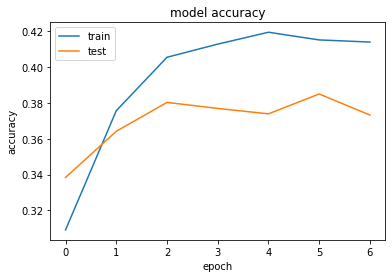

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()